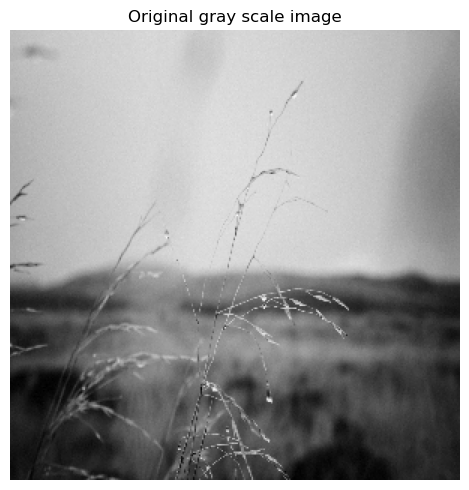

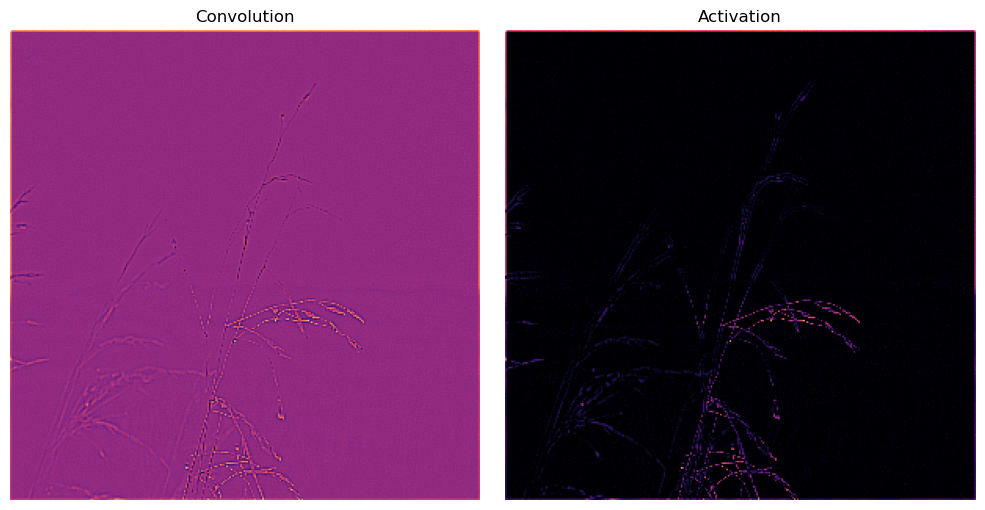

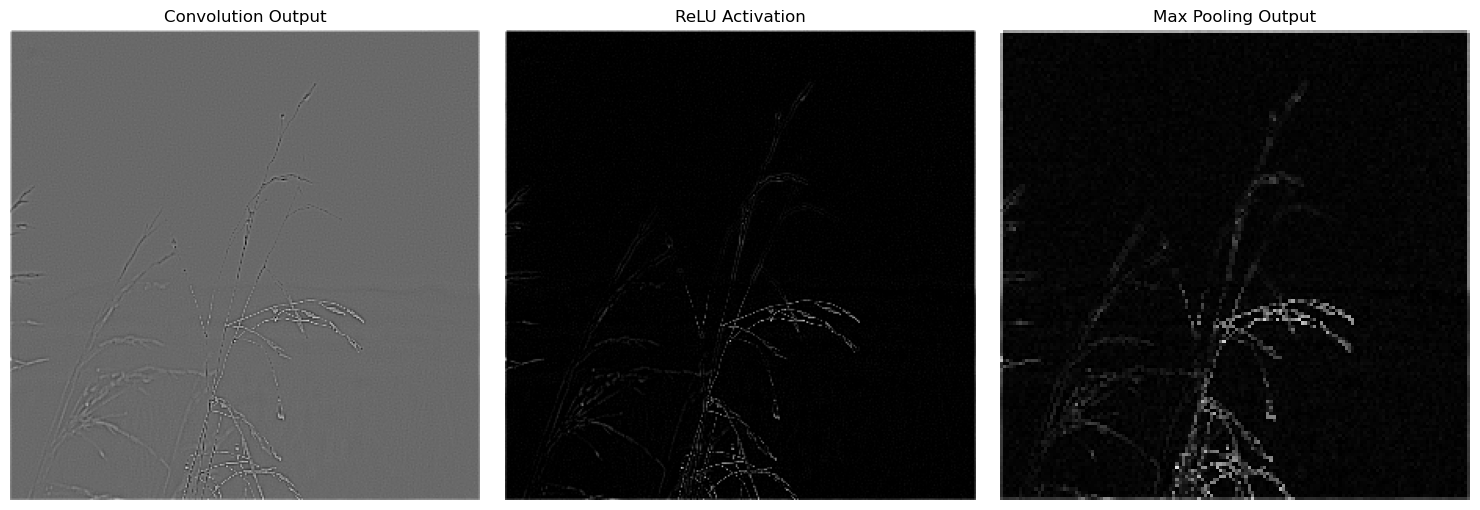

In [27]:
#implement image edge detection using convolution

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

#set the param
plt.rc('figure', autolayout=True)
plt.rc('image' , cmap='magma')

#define the kernal
kernal = tf.constant([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1],])

#loading image
image = tf.io.read_file('nature.jpg')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[300, 300])

#plot the image
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5,5))
plt.imshow(img,cmap="gray")
plt.axis('off')
plt.title("Original gray scale image")
plt.show()

#reformate
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernal = tf.reshape(kernal, [*kernal.shape, 1,1])
kernal = tf.cast(kernal, dtype=tf.float32)

#convolution layer
conv_fn = tf.nn.conv2d
image_filter = conv_fn(input=image, filters=kernal,
strides=1, padding='SAME',) 
plt.figure(figsize=(15, 5))

#plot the convolved image
plt.subplot(1,3,1)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('Convolution')

#activation layer
relu_fn = tf.nn.relu

#image detection
image_detect = relu_fn(image_filter)
plt.subplot(1,3,2)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title('Activation')

#pooling layer(Fixed)
image_condense = tf.nn.pool(
    input=image_detect,
    window_shape=(2,2),
    pooling_type='MAX',
    strides=(2,2),
    padding='SAME')

#dispaly all results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(tf.squeeze(image_filter), cmap='gray')
plt.title('Convolution Output')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(tf.squeeze(image_detect), cmap='gray')
plt.title('ReLU Activation')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(tf.squeeze(image_condense), cmap='gray')
plt.title('Max Pooling Output')
plt.axis('off')

plt.show()









In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt